In [28]:
import numpy as np
import pandas as pd
import os
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
input_path = os.getcwd().replace('notebooks','input')
os.chdir(input_path)

In [4]:
ls

 Volume in drive C is Windows
 Volume Serial Number is EA11-38FE

 Directory of C:\Users\DE786\general_documentation\intro_stat_learning\input

07/28/2022  09:34 AM    <DIR>          .
07/28/2022  09:34 AM    <DIR>          ..
07/28/2022  09:34 AM             4,756 Advertising.csv
07/28/2022  09:34 AM            18,079 Auto.csv
07/28/2022  09:34 AM            30,691 Auto.data
07/28/2022  09:34 AM           635,645 Bikeshare.csv
07/28/2022  09:34 AM            34,816 Boston.csv
07/28/2022  09:34 AM             5,739 BrainCancer.csv
07/28/2022  09:34 AM         1,030,640 Caravan.csv
07/28/2022  09:34 AM            19,445 Carseats.csv
07/28/2022  09:34 AM           404,088 Ch12Ex13.csv
07/28/2022  09:34 AM            78,848 College.csv
07/28/2022  09:34 AM            17,776 Credit.csv
07/28/2022  09:34 AM           443,675 Default.csv
07/28/2022  09:34 AM         1,782,182 Fund.csv
07/28/2022  09:34 AM            20,229 Heart.csv
07/28/2022  09:34 AM            22,878 Hitters.csv
07/28/20

<AxesSubplot:xlabel='Education', ylabel='Income'>

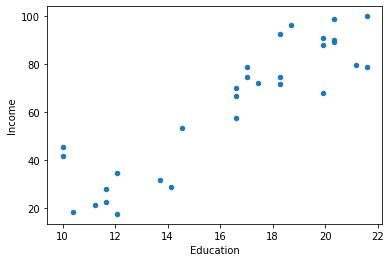

In [7]:
#scatter plot
# df = pd.read_csv('Advertising.csv')
df = pd.read_csv('Income2.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.plot(x='Education',y='Income',kind='scatter')

In [8]:
#linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(df[['Education','Seniority']], df['Income'])
lin_reg.intercept_, lin_reg.coef_

(-50.08563875473378, array([5.89555596, 0.17285547]))

In [18]:
df = pd.read_csv('Advertising.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)

# linear regression in sklearn
# lin_reg = LinearRegression()
# lin_reg.fit(df[['TV','radio','newspaper']], df['sales'])
# lin_reg.intercept_, lin_reg.coef_

# linear regression in sm; better summary
ols = sm.OLS(df['sales'],sm.add_constant(df[['TV','radio','newspaper']]))
# ols = sm.OLS(df['sales'],sm.add_constant(df[['TV']]))
ols_result = ols.fit()
ols_result.summary()

C:\Users\DE786\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           1.58e-96
Time:                        09:42:47   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
df.corr().loc['TV','radio']

0.05480866446583008

In [14]:
df = pd.read_csv('Credit.csv')
df = pd.get_dummies(df)
response = 'Balance'
predictors = list(set(df.columns) - set([response]))
y = df[response]
x = df[predictors]
lin_reg = LinearRegression()
lin_reg.fit(x,y)
#statsmodels has a nicer summary than sklearn
ols = sm.OLS(y,sm.add_constant(x))
# ols = sm.OLS(df['sales'],sm.add_constant(df[['TV']]))
ols_result = ols.fit()
ols_result.summary()

C:\Users\DE786\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Thu, 28 Jul 2022   Prob (F-statistic):          1.11e-253
Time:                        09:41:50   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -94.2202     12.284     -7.670      0.000    -118.372     -70.068
Age             -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Student_No    -259.9838      9.100    -28.570      0.000    -277.875    -242.093
Married_No     -42.8432      7.889     -5.431      0.000     -58.353     -27.333
Cards           17.7245      4.341      4.083      0.000       9.190      26.259
Income          -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Married_Yes    -51.3771      8.180     -6.281      0.000     -67.460     -35.294
Own_Yes        -52.4367      7.828     -6.698      0.000     -67.828     -37.045
Limit            0.1909      0.033      5.824      0.000       0.126       0.255
Own_No         -41.7835      7.957     -5.251      0.000     -57.427     -26.140
Region_East    -40.3772      9.113     -4.431      0.000     -58.295     -22.459
Education       -1.0989      1.598     -0.688      0.492      -4.241       2.043
Region_West    -23.5730      8.631     -2.731      0.007     -40.542      -6.604
Rating           1.1365      0.491      2.315      0.021       0.171       2.102
Student_Yes    165.7636     11.509     14.402      0.000     143.135     188.392
Region_South   -30.2701      7.608     -3.978      0.000     -45.229     -15.311
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     1.17e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.12e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [21]:
#RSS, RSE

rss = np.sum((ols_result.predict() - df['sales']) ** 2)
n = len(df)
rse = np.sqrt(1/(n-2) * rss)
[rss,rse]

[556.8252629021872, 1.6769760888385674]

In [7]:
df = pd.read_csv('College.csv')
df.rename(columns={'Unnamed: 0':'University Name'},inplace=True)
# df.set_index('University Name',inplace=True)

<Figure size 432x288 with 0 Axes>

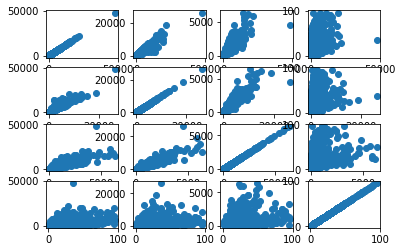

In [18]:
#subplots
import matplotlib.pyplot as plt
fig = plt.figure()
n=4
fig, axes = plt.subplots(n,n)
for i in range(n):
    for j in range(n):
        axes[i,j].scatter(df.iloc[:,i+2],df.iloc[:,j+2])

In [40]:
df = pd.read_csv('Credit.csv')
df.dropna(inplace=True)
y = df['Balance']
x = df[['Age','Rating','Limit']]
# x = df[['Age','Limit']]
display(x.corr())

ols = sm.OLS(y,sm.add_constant(x))
ols_result = ols.fit()
# ols_result.summary()

# VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = sm.add_constant(x)
pd.Series([variance_inflation_factor(x.values, i) 
               for i in range(x.shape[1])], 
              index=x.columns)

,Age,Rating,Limit
Age,1.000000,0.103165,0.100888
Rating,0.103165,1.000000,0.996880
Limit,0.100888,0.996880,1.000000


C:\Users\DE786\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\DE786\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


const      23.802955
Age         1.011385
Rating    160.668301
Limit     160.592880
dtype: float64

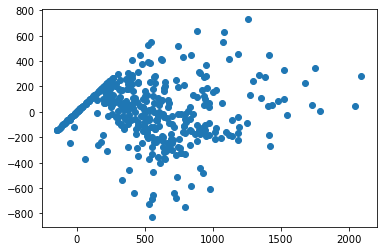

In [35]:
#residual plot
plt.scatter(ols_result.predict(),ols_result.predict() - y)